<a href="https://colab.research.google.com/github/oerv13/Ibero/blob/main/Act4_Exploraci%C3%B3n_visual_y_diagn%C3%B3stico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 4 Diseño e Implementación de un Modelo de IA Aplicado a un Contexto Real





Walter de Jesús Tuirán Dávila
Jaime Eduardo Rodríguez Labrador
Omar Eduardo Riaño Velásquez




Profesor:Julian Andrés Gutierrez Londoño




Corporación universitaria Iberoamericana
Facultad de ingeniería




Especialización IA
Noviembre de 2025

**1. Selección del dataset**

Se toma la base de datos de unas pruebas realizadas en el ambiente de test para el proceso Nacha, estos datos no son productivos, son simulados para la validacion de todo el proceso.   

**2. Configuración del entorno**

In [1]:
import pandas as pd # Proporciona DataFrames y Series para la manipulación, limpieza, transformación y análisis eficiente de datos tabulares.
import matplotlib.pyplot as plt # Es la librería base para crear gráficos estáticos, interactivos y de alta calidad para la visualización de datos
import seaborn as sns # Construida sobre Matplotlib, ofrece una interfaz de alto nivel para dibujar gráficos estadísticos informativos y atractivos.
import numpy as np # La librería fundamental para el cálculo numérico, proporcionando arrays y matrices N-dimensionales y funciones matemáticas de alto rendimiento.


**3. Carga y exploración inicial de los datos**

In [2]:
#Define la ruta del archivo
file_path = '/content/sample_data/Nacha3.csv'

#Carga el archivo CSV en un DataFrame, especificando dtypes to suppress DtypeWarning
try:
  df_housing = pd.read_csv(file_path, dtype={'IDDESTINATARIO': str, 'CTADESTINO': str, 'CODRESP': str, 'DATAADDITIONAL': str})
  print ("El dataframe ha sido cargado con exito")
except FileNotFoundError:
    print (f"Error al cargar el archivo: {file_path}")
    df_housing = None #Validar carga


El dataframe ha sido cargado con exito


In [3]:
# Visualizacion de la data cargada desde el DataSet
df_housing

,TRANSACTION_ID,RANGOFECHA,CODTRANSAC,IDENTIDADDESTINO,NAMEENTIDADDESTINO,IDENTIDADORIGEN,NAMEENTIDADORIGEN,IDDESTINATARIO,CTADESTINO,NOMDESTINATARIO,VALORTRANSAC,NUMRASTREO,CODRESP,VALORTRANSAC_1,TIPOTRANSACCION,IDORIGINADOR,DATAADDITIONAL,NAMEORIGINADOR,OBSERVACION
0,355330042,08/08/24 07:57:06.859000000,27,10061,Banco de Bogota,10016,Banco de Bogota,NaN,406030188608,MENAJE SA,103000.0,10011012103,NaN,1.030000e+05,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
1,355330051,08/08/24 08:22:48.259000000,27,10061,Banco de Bogota,10016,Banco de Bogota,890301886,406030188608,MENAJE SA @,107000.0,10011012107,NaN,1.070000e+05,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
2,355330059,08/08/24 08:44:33.792000000,36,10061,Banco de Bogota,10016,Banco de Bogota,890301886,406030188608,MENAJE SA,1223400.0,10012012109,R04,1.223400e+06,Debito,9002449962,014444555,Colegio Uno,DEVOLUCION
3,355330061,08/08/24 08:51:43.153000000,27,10139,Banco de Bogota,10016,Banco de Bogota,890301886,406030188608,MENAJE SA,43100.0,10011012043,NaN,4.310000e+04,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
4,355330069,08/08/24 09:13:56.261000000,37,10061,Banco de Bogota,10016,Banco de Bogota,890301886,406030188608,MENAJE SA,112000.0,10011012112,NaN,1.120000e+05,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858695,270368842,02/08/23 15:45:26.919000000,22,10016,Banco de Bogota,10139,BBVA Colombia,890301886,406030188608,MENAJE SA,5884100.0,100010510058841,NaN,2.000010e+12,Credito,9002449962,014444555,Colegio Uno,TRASLADOS
858696,270368843,02/08/23 15:45:26.919000000,22,10016,Banco de Bogota,10139,BBVA Colombia,890301886,406030188608,MENAJE SA,5884200.0,100010510058842,NaN,2.000010e+12,Credito,9002449962,014444555,Colegio Uno,TRASLADOS
858697,270368846,02/08/23 15:45:26.919000000,22,10016,Banco de Bogota,10139,BBVA Colombia,890301886,406030188608,MENAJE SA,5884500.0,100010510058845,NaN,2.000010e+12,Credito,9002449962,014444555,Colegio Uno,TRASLADOS
858698,270368847,02/08/23 15:45:26.919000000,22,10016,Banco de Bogota,10139,BBVA Colombia,890301886,406030188608,MENAJE SA,5884600.0,100010510058846,NaN,2.000010e+12,Credito,9002449962,014444555,Colegio Uno,TRASLADOS


In [4]:
df_housing.head()

,TRANSACTION_ID,RANGOFECHA,CODTRANSAC,IDENTIDADDESTINO,NAMEENTIDADDESTINO,IDENTIDADORIGEN,NAMEENTIDADORIGEN,IDDESTINATARIO,CTADESTINO,NOMDESTINATARIO,VALORTRANSAC,NUMRASTREO,CODRESP,VALORTRANSAC_1,TIPOTRANSACCION,IDORIGINADOR,DATAADDITIONAL,NAMEORIGINADOR,OBSERVACION
0,355330042,08/08/24 07:57:06.859000000,27,10061,Banco de Bogota,10016,Banco de Bogota,NaN,406030188608,MENAJE SA,103000.0,10011012103,NaN,103000.0,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
1,355330051,08/08/24 08:22:48.259000000,27,10061,Banco de Bogota,10016,Banco de Bogota,890301886,406030188608,MENAJE SA @,107000.0,10011012107,NaN,107000.0,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
2,355330059,08/08/24 08:44:33.792000000,36,10061,Banco de Bogota,10016,Banco de Bogota,890301886,406030188608,MENAJE SA,1223400.0,10012012109,R04,1223400.0,Debito,9002449962,014444555,Colegio Uno,DEVOLUCION
3,355330061,08/08/24 08:51:43.153000000,27,10139,Banco de Bogota,10016,Banco de Bogota,890301886,406030188608,MENAJE SA,43100.0,10011012043,NaN,43100.0,Debito,9002449962,014444555,Colegio Uno,TARCREDITO
4,355330069,08/08/24 09:13:56.261000000,37,10061,Banco de Bogota,10016,Banco de Bogota,890301886,406030188608,MENAJE SA,112000.0,10011012112,NaN,112000.0,Debito,9002449962,014444555,Colegio Uno,TARCREDITO


In [6]:
# Atributos de exploración de los df
if df_housing is not None:
  print(df_housing.head(10))
df_housing.columns


   TRANSACTION_ID                   RANGOFECHA  CODTRANSAC  IDENTIDADDESTINO  \
0       355330042  08/08/24 07:57:06.859000000          27             10061   
1       355330051  08/08/24 08:22:48.259000000          27             10061   
2       355330059  08/08/24 08:44:33.792000000          36             10061   
3       355330061  08/08/24 08:51:43.153000000          27             10139   
4       355330069  08/08/24 09:13:56.261000000          37             10061   
5       355330070  08/08/24 09:13:56.261000000          37             10061   
6       355330300  09/08/24 10:58:37.813000000          32             10139   
7       320320068  29/01/24 15:41:31.658000000          37             10061   
8       320320051  29/01/24 14:45:31.928000000          32             10139   
9       320320034  29/01/24 10:11:15.972000000          27             10139   

  NAMEENTIDADDESTINO  IDENTIDADORIGEN NAMEENTIDADORIGEN IDDESTINATARIO  \
0    Banco de Bogota            10016   Banco

Index(['TRANSACTION_ID', 'RANGOFECHA', 'CODTRANSAC', 'IDENTIDADDESTINO',
       'NAMEENTIDADDESTINO', 'IDENTIDADORIGEN', 'NAMEENTIDADORIGEN',
       'IDDESTINATARIO', 'CTADESTINO', 'NOMDESTINATARIO', 'VALORTRANSAC',
       'NUMRASTREO', 'CODRESP', 'VALORTRANSAC_1', 'TIPOTRANSACCION',
       'IDORIGINADOR', 'DATAADDITIONAL', 'NAMEORIGINADOR', 'OBSERVACION'],
      dtype='object')

In [7]:
# Información general del dataset
df_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858700 entries, 0 to 858699
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TRANSACTION_ID      858700 non-null  int64  
 1   RANGOFECHA          858700 non-null  object 
 2   CODTRANSAC          858700 non-null  int64  
 3   IDENTIDADDESTINO    858700 non-null  int64  
 4   NAMEENTIDADDESTINO  858700 non-null  object 
 5   IDENTIDADORIGEN     858700 non-null  int64  
 6   NAMEENTIDADORIGEN   858700 non-null  object 
 7   IDDESTINATARIO      858692 non-null  object 
 8   CTADESTINO          858700 non-null  object 
 9   NOMDESTINATARIO     858530 non-null  object 
 10  VALORTRANSAC        858700 non-null  float64
 11  NUMRASTREO          858700 non-null  int64  
 12  CODRESP             1129 non-null    object 
 13  VALORTRANSAC_1      858689 non-null  float64
 14  TIPOTRANSACCION     858700 non-null  object 
 15  IDORIGINADOR        858700 non-nul

In [8]:
# Estadísticas descriptivas
df_housing.describe()

,TRANSACTION_ID,CODTRANSAC,IDENTIDADDESTINO,IDENTIDADORIGEN,VALORTRANSAC,NUMRASTREO,VALORTRANSAC_1,IDORIGINADOR
count,8.587000e+05,858700.000000,858700.000000,858700.000000,8.587000e+05,8.587000e+05,8.586890e+05,8.587000e+05
mean,2.585337e+08,24.667421,10040.396638,10121.337962,3.995570e+10,7.298652e+13,1.499501e+12,7.108738e+09
std,1.450194e+07,4.488863,104.878746,29.155258,1.403089e+13,4.440853e+13,1.405492e+13,3.149556e+09
min,1.465263e+08,21.000000,10016.000000,10016.000000,0.000000e+00,1.001000e+10,0.000000e+00,5.459300e+04
25%,2.603426e+08,22.000000,10016.000000,10074.000000,5.000000e+01,1.007011e+10,1.000000e+05,1.989668e+09
50%,2.605573e+08,22.000000,10016.000000,10139.000000,5.770700e+06,1.000105e+14,2.000010e+12,9.002450e+09
75%,2.607720e+08,32.000000,10074.000000,10139.000000,1.290532e+07,1.000105e+14,2.000010e+12,9.002450e+09
max,3.803300e+08,57.000000,18885.000000,10139.000000,5.200000e+15,1.000105e+14,5.200000e+15,9.018413e+09


In [9]:
# Ver cantidad de valores nulos por columna
df_housing.isnull().sum()

,0
TRANSACTION_ID,0
RANGOFECHA,0
CODTRANSAC,0
IDENTIDADDESTINO,0
NAMEENTIDADDESTINO,0
IDENTIDADORIGEN,0
NAMEENTIDADORIGEN,0
IDDESTINATARIO,8
CTADESTINO,0
NOMDESTINATARIO,170


In [10]:
# Ver cantidad de valores duplicados
df_housing.duplicated().sum()

np.int64(0)

Se revisan los valores faltantes para identificar posibles problemas de calidad de datos.

Dependiendo del volumen y relevancia de los nulos, se decide si se eliminan filas, se imputan valores o se dejan tal cual. En un contexto financiero, es preferible no imputar montos o códigos críticos sin criterio sólido, por lo que se opta por eliminar solo registros claramente incompletos.

In [11]:
# Eliminamos filas con valores faltantes (si la cantidad es baja).
# Si hubiera muchos nulos, aquí se justificaría otra estrategia de imputación.
df =  df_housing.dropna()
print("Dimensiones después de eliminar nulos:", df.shape)

Dimensiones después de eliminar nulos: (1009, 19)


Se identifican outliers en el campo de monto. En el contexto de transacciones financieras, los valores extremos pueden corresponder a operaciones de alto valor o a errores de digitación.
En este proyecto, se asume que los montos extremos son relevantes para la detección de anomalías, por lo que no se eliminan, pero sí se normalizan para evitar que dominen el entrenamiento de los modelos.

In [12]:
# Media y Mediana por NAMEENTIDADORIGEN y VALORTRANSAC
pd.set_option('display.float_format', '{:.2f}'.format)

mediana = df_housing.groupby('NAMEENTIDADORIGEN')['VALORTRANSAC'].median()
media = df_housing.groupby('NAMEENTIDADORIGEN')['VALORTRANSAC'].mean()
mediana

,VALORTRANSAC
NAMEENTIDADORIGEN,
BBVA Colombia,9556700.00
Banco de Bogota,1117400000.00
Bancolombia,1.00
Citibank,19100.00
Itau,89700.00


Se identifican outliers en el campo de monto. En el contexto de transacciones financieras, los valores extremos pueden corresponder a operaciones de alto valor o a errores de digitación.
En este proyecto, se asume que los montos extremos son relevantes para la detección de anomalías, por lo que no se eliminan, pero sí se normalizan para evitar que dominen el entrenamiento de los modelos.

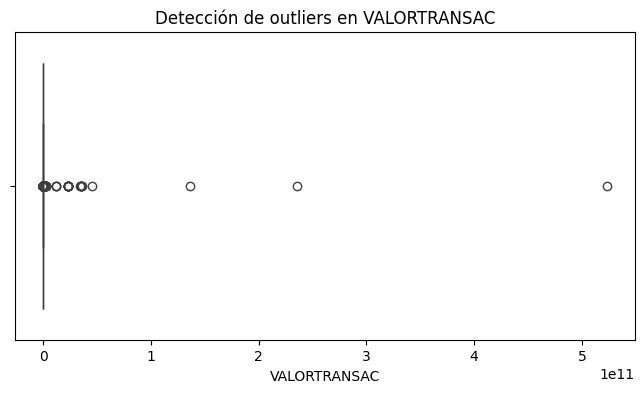

In [13]:
# ============================================
# 3.3 Detección de outliers en el monto
# ============================================

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["VALORTRANSAC"])
plt.title("Detección de outliers en VALORTRANSAC")
plt.xlabel("VALORTRANSAC")
plt.show()

En montos financieros los outliers no se eliminan de inmediato, porque:

pueden representar errores reales, son importantes para análisis de riesgo,
podrían ser transacciones fraudulentas.:

 Normalización / Estandarización

### 3.5 Normalización de variables numéricas

Para estabilizar la magnitud del monto de la transacción, se aplica estandarización a:

- `VALORTRANSAC`
- `VALORTRANSAC_1` (si contiene información diferente)

Esto es importante para modelos que son sensibles a escalas.


In [14]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df_housing["VALORTRANSAC_scaled"] = scaler.fit_transform(df_housing[["VALORTRANSAC"]])
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

# 3.5 Normalización de variables numéricas (versión sin warnings)

# Columnas a escalar
numeric_candidates = ["VALORTRANSAC", "VALORTRANSAC_1"]
numeric_cols = [col for col in numeric_candidates if col in df.columns]

print("Columnas numéricas a escalar:", numeric_cols)

# Convertir a numérico usando loc (evita SettingWithCopyWarning)
for col in numeric_cols:
    df.loc[:, col] = pd.to_numeric(df[col], errors="coerce")

# Instanciar el escalador
scaler = StandardScaler()

# Crear nuevas columnas escaladas usando loc (evita Warning)
scaled_cols = [col + "_scaled" for col in numeric_cols]

df.loc[:, scaled_cols] = scaler.fit_transform(df[numeric_cols])

df[scaled_cols].head()


Columnas numéricas a escalar: ['VALORTRANSAC', 'VALORTRANSAC_1']


,VALORTRANSAC_scaled,VALORTRANSAC_1_scaled
2,-0.08,-0.08
19,-0.08,-0.08
24,-0.08,-0.08
29,-0.08,-0.08
40,-0.08,-0.08


3.5 Codificación categórica

Para usar IA necesitamos convertir texto como "R04", "R01", “BANCOLOMBIA” en números.

In [15]:
# One-Hot-Encoding para variables categóricas
df_encoded = pd.get_dummies(df_housing,
                            columns=["IDENTIDADORIGEN", "CODRESP", "CODTRANSAC"],
                            drop_first=True)
df_encoded.head()

,TRANSACTION_ID,RANGOFECHA,IDENTIDADDESTINO,NAMEENTIDADDESTINO,NAMEENTIDADORIGEN,IDDESTINATARIO,CTADESTINO,NOMDESTINATARIO,VALORTRANSAC,NUMRASTREO,...,CODTRANSAC_33,CODTRANSAC_36,CODTRANSAC_37,CODTRANSAC_38,CODTRANSAC_51,CODTRANSAC_52,CODTRANSAC_53,CODTRANSAC_55,CODTRANSAC_56,CODTRANSAC_57
0,355330042,08/08/24 07:57:06.859000000,10061,Banco de Bogota,Banco de Bogota,NaN,406030188608,MENAJE SA,103000.00,10011012103,...,False,False,False,False,False,False,False,False,False,False
1,355330051,08/08/24 08:22:48.259000000,10061,Banco de Bogota,Banco de Bogota,890301886,406030188608,MENAJE SA @,107000.00,10011012107,...,False,False,False,False,False,False,False,False,False,False
2,355330059,08/08/24 08:44:33.792000000,10061,Banco de Bogota,Banco de Bogota,890301886,406030188608,MENAJE SA,1223400.00,10012012109,...,False,True,False,False,False,False,False,False,False,False
3,355330061,08/08/24 08:51:43.153000000,10139,Banco de Bogota,Banco de Bogota,890301886,406030188608,MENAJE SA,43100.00,10011012043,...,False,False,False,False,False,False,False,False,False,False
4,355330069,08/08/24 09:13:56.261000000,10061,Banco de Bogota,Banco de Bogota,890301886,406030188608,MENAJE SA,112000.00,10011012112,...,False,False,True,False,False,False,False,False,False,False


### 3.4 División del dataset en entrenamiento y prueba

Para evaluar adecuadamente el rendimiento del modelo de inteligencia artificial, es necesario separar el dataset en dos subconjuntos:

- **Conjunto de entrenamiento (Train):**  
  Corresponde al 80% de los datos y se utiliza para que el modelo aprenda los patrones presentes en las transacciones NACHA.

- **Conjunto de prueba (Test):**  
  Corresponde al 20% restante y se emplea exclusivamente para evaluar el desempeño del modelo con datos nunca vistos durante el entrenamiento.

Dado que la variable objetivo `ERROR` puede estar desbalanceada (muchas transacciones correctas y pocas erróneas), se utiliza la opción `stratify=y` para mantener la misma proporción de clases en ambos subconjuntos, evitando sesgos en el aprendizaje.


In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 1. Crear la variable objetivo ERROR en df (si no existe aún)
if "ERROR" not in df.columns:
    df["ERROR"] = np.where(df["CODRESP"] == "OK", 0, 1)

# 2. Definir qué columnas se usarán como predictoras (sin eliminar ninguna del df original)
#    Aquí puedes ajustar la lista si quieres añadir o quitar columnas.
predictor_cols = [
    "RANGOFECHA",
    "CODTRANSAC",
    "TIPOTRANSACCION",
    "IDENTIDADDESINO",
    "NAMEENTIDADDESINO",
    "IDENTIDADORIGEN",
    "NAMEENTIDADORIGEN",
    "VALORTRANSAC",
    "VALORTRANSAC_1"
]

# Nos quedamos solo con las que realmente existen en el df
predictor_cols = [c for c in predictor_cols if c in df.columns]

# 3. Construimos X e y a partir de df
X = df[predictor_cols].copy()
y = df["ERROR"].copy()

# 4. Procesamos la fecha si RANGOFECHA está
if "RANGOFECHA" in X.columns:
    X["RANGOFECHA"] = pd.to_datetime(X["RANGOFECHA"], errors="coerce").astype("int64") // 10**9

# 5. Normalizar columnas numéricas si las tienes
from sklearn.preprocessing import StandardScaler

numeric_candidates = ["VALORTRANSAC", "VALORTRANSAC_1"]
numeric_cols = [col for col in numeric_candidates if col in X.columns]

scaler = StandardScaler()
if numeric_cols:
    X.loc[:, numeric_cols] = scaler.fit_transform(X[numeric_cols])

# 6. Codificar variables categóricas con One-Hot Encoding
categorical_cols = [
    "CODTRANSAC", "TIPOTRANSACCION",
    "IDENTIDADDESINO", "IDENTIDADORIGEN",
    "NAMEENTIDADDESINO", "NAMEENTIDADORIGEN"
]
categorical_cols = [c for c in categorical_cols if c in X.columns]

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 7. División en entrenamiento y prueba (80/20, estratificada)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("La división ha sido completada exitosamente:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)



La división ha sido completada exitosamente:
X_train: (807, 15)
X_test : (202, 15)
y_train: (807,)
y_test : (202,)


/tmp/ipython-input-2205943559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ERROR"] = np.where(df["CODRESP"] == "OK", 0, 1)
/tmp/ipython-input-2205943559.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X["RANGOFECHA"] = pd.to_datetime(X["RANGOFECHA"], errors="coerce").astype("int64") // 10**9


MÓDULO 4 — SELECCIÓN Y ENTRENAMIENTO DEL MODELO

## 4. Selección y entrenamiento del modelo

El objetivo del proyecto es clasificar transacciones NACHA como:
- **0 = transacción correcta**
- **1 = transacción con error**

Por lo tanto, este es un **problema de clasificación supervisada**.

Para este proyecto se entrenarán dos modelos:

1. **Regresión Logística**  
   Modelo base, lineal, interpretable, útil para establecer un punto de comparación.

2. **Random Forest Classifier**  
   Modelo principal, basado en ensambles de árboles.  
   Ventajas:
   - maneja variables categóricas codificadas,
   - es robusto ante outliers,
   - captura relaciones no lineales,
   - reduce el riesgo de sobreajuste,
   - permite interpretar importancia de características.

Además, se ajustan hiperparámetros moderados para mejorar el desempeño sin sobreentrenar.


In [17]:
#Regresión logística
# === PREPROCESAMIENTO ===

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_housing['CODTRANSAC'] = le.fit_transform(df_housing['CODTRANSAC'])
df_housing['IDENTIDADORIGEN'] = le.fit_transform(df_housing['IDENTIDADORIGEN'])
df_housing['CODRESP'] = le.fit_transform(df_housing['CODRESP'])

# === SELECCIÓN DE VARIABLES ===
X = df_housing[['CODTRANSAC', 'IDENTIDADORIGEN']]
y = df_housing['CODRESP']

# === TRAIN TEST SPLIT ===
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === REGRESIÓN LOGÍSTICA ===
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

print("Modelo entrenado correctamente Regresión Logística.")


Modelo entrenado correctamente Regresión Logística.


MÓDULO 5 — EVALUACIÓN DEL MODELO Métricas obligatorias:

## 5. Evaluación del modelo (Aprendizaje No Supervisado)

Debido a que el dataset NACHA3 contiene exclusivamente transacciones fallidas
(no existen transacciones con respuesta “OK”), el problema no puede
enmarcarse como una clasificación binaria.

En su lugar, se utiliza un enfoque de **aprendizaje no supervisado**,
enfocado en:

1. **Segmentar transacciones fallidas** para encontrar patrones internos.
2. **Detectar anomalías**, es decir, errores que se comportan de manera
   diferente al resto.

Para ello se emplean dos modelos:
- **K-Means** (clustering)
- **Isolation Forest** (detección de anomalías)

Las métricas utilizadas son:
- **Silhouette Score**: mide la calidad de los clusters.
- **Inertia**: mide la cohesión interna de los clusters.
- **Anomaly Score**: identifica transacciones atípicas incluso dentro del
  conjunto de errores.


In [37]:
# Importar las métricas de clasificación necesarias
from sklearn.metrics import classification_report, accuracy_score

# Asegúrate de que las variables y_test y y_pred ya estén definidas
# Si usaste mi código anterior, serían las variables:
# y_test = [...]
# y_pred = model_logreg.predict(X_test)


# --- 1. CÁLCULO DE MÉTRICAS DE CLASIFICACIÓN ---

# 1.1. Precisión General (Accuracy)
# Mide el porcentaje de todas las predicciones que fueron correctas.
accuracy = accuracy_score(y_test, y_pred)

# 1.2. Reporte Detallado (Incluye Recall, F1-Score y Precision por Clase)
# 'classification_report' es la forma más fácil y completa de ver estas métricas.
reporte_clasificacion = classification_report(y_test, y_pred)


# --- 2. IMPRESIÓN DE RESULTADOS ---

print("\n## 📋 Reporte de Métricas de Clasificación (CODRESP)")
print("-----------------------------------------------------")

# Métrica Resumida: Accuracy
print(f"Precisión General (Accuracy): {accuracy:.4f}")

# Métrica Detallada: Recall, F1-Score y Precision por clase
print("\n### Detalle por Clase (Recall, F1-Score, Precision):")
print(reporte_clasificacion)


# --- 💡 Interpretación Clave ---
print("\n--- Diagnóstico de Desequilibrio de Clases ---")
print("Busca los valores de **Recall** y **F1-Score** para las clases '0' a '6'.")
print("Si el modelo tiene sesgo (como sugieren tus gráficas), estos valores serán muy cercanos a 0.00,")
print("incluso si el **Accuracy** general es alto (debido al dominio de la Clase 7).")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



## 📋 Reporte de Métricas de Clasificación (CODRESP)
-----------------------------------------------------
Precisión General (Accuracy): 0.9987

### Detalle por Clase (Recall, F1-Score, Precision):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        95
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00    171521

    accuracy                           1.00    171740
   macro avg       0.12      0.12      0.12    171740
weighted avg       1.00      1.00      1.00    171740


--- Diagnóstico de Desequilibrio de Clases ---
Busca los valores de **Recall** y **F1-Score** para las clases '0' a '6'.
Si el modelo tiene sesgo (com

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
#Entrenar modelo K-Means (clustering)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Entrenamos con 3 clusters (puedes ajustarlo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train)

# Etiquetas asignadas
clusters = kmeans.labels_

# Evaluación
sil_score = silhouette_score(X_train, clusters)
print("Silhouette Score:", sil_score)



KeyboardInterrupt: 

In [ ]:
# Método del codo (Elbow Method)
inertias = []
K = range(2, 8)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_train)
    inertias.append(model.inertia_)

plt.plot(K, inertias, marker="o")
plt.title("Método del Codo (Elbow Method)")
plt.xlabel("Número de Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()



In [ ]:
#Detección de anomalías con Isolation Forest
from sklearn.ensemble import IsolationForest

# Entrenar Isolation Forest sobre los datos de entrenamiento
iso = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42
)

iso.fit(X_train)

# Obtener score de anomalía en el set de prueba
anom_scores = iso.decision_function(X_test)   # valores negativos = más anómalos
anom_labels = iso.predict(X_test)             # -1 = anomalía, 1 = normal

print("Anomalías detectadas:", (anom_labels == -1).sum())



Anomalías detectadas: 1793


/tmp/ipython-input-943048436.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X["RANGOFECHA"] = pd.to_datetime(X["RANGOFECHA"], errors="coerce").astype("int64") // 10**9


División completada correctamente:
X_train: (686960, 29)
X_test : (171740, 29)
Anomalías detectadas: 8519 de 171740


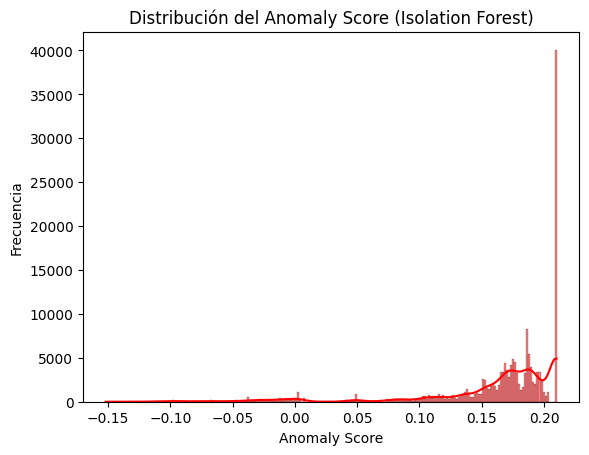


Top 10 transacciones más anómalas:


,RANGOFECHA,VALORTRANSAC,VALORTRANSAC_1,CODTRANSAC_22,CODTRANSAC_23,CODTRANSAC_26,CODTRANSAC_27,CODTRANSAC_28,CODTRANSAC_31,CODTRANSAC_32,...,IDENTIDADORIGEN_10061,IDENTIDADORIGEN_10074,IDENTIDADORIGEN_10090,IDENTIDADORIGEN_10139,NAMEENTIDADORIGEN_Banco de Bogota,NAMEENTIDADORIGEN_Bancolombia,NAMEENTIDADORIGEN_Citibank,NAMEENTIDADORIGEN_Itau,anomaly_score,is_anomaly
225082,1730198493,-0.002843,-0.106684,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,-0.151850,-1
225974,1731932216,-0.002843,-0.106684,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,-0.151586,-1
229386,1732017719,-0.002847,-0.106688,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,-0.141703,-1
229552,1726127176,-0.002697,-0.106538,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,-0.141559,-1
229585,1740469582,-0.002697,-0.106538,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,-0.141298,-1
229582,1739430718,-0.002697,-0.106538,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,-0.141298,-1
229558,1734595295,-0.002697,-0.106538,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,-0.141298,-1
229555,1734334283,-0.002697,-0.106538,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,-0.141298,-1
229598,1742540775,-0.002697,-0.106538,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,-0.141298,-1
229584,1739951477,-0.002697,-0.106538,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,-0.141298,-1


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# ============================================================
#     CELDA COMPLETA: PREPROCESAMIENTO + SPLIT + ANOMALÍAS
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# -----------------------------------------
# 1. Cargar dataset
# -----------------------------------------

df = pd.read_csv("Nacha3.csv", low_memory=False)

# Normalizar CODRESP y crear ERROR
df["CODRESP"] = df["CODRESP"].astype(str).str.strip().str.upper()
df["ERROR"] = df["CODRESP"].apply(lambda x: 0 if x == "OK" else 1)

# -----------------------------------------
# 2. Seleccionar variables predictoras
# (usamos todas las columnas relevantes)
# -----------------------------------------

predictor_cols = [
    "RANGOFECHA", "CODTRANSAC", "TIPOTRANSACCION",
    "IDENTIDADDESINO", "IDENTIDADORIGEN",
    "NAMEENTIDADDESINO", "NAMEENTIDADORIGEN",
    "VALORTRANSAC", "VALORTRANSAC_1"
]

# Filtrar solo las que existan
predictor_cols = [col for col in predictor_cols if col in df.columns]

X = df[predictor_cols].copy()
y = df["ERROR"].copy()

# -----------------------------------------
# 3. Convertir fecha a número
# -----------------------------------------

if "RANGOFECHA" in X.columns:
    X["RANGOFECHA"] = pd.to_datetime(X["RANGOFECHA"], errors="coerce").astype("int64") // 10**9

# -----------------------------------------
# 4. Escalar variables numéricas
# -----------------------------------------

numeric_cols = [col for col in ["VALORTRANSAC", "VALORTRANSAC_1"] if col in X.columns]
scaler = StandardScaler()

if numeric_cols:
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# -----------------------------------------
# 5. Codificar variables categóricas
# -----------------------------------------

categorical_cols = [
    "CODTRANSAC", "TIPOTRANSACCION",
    "IDENTIDADDESINO", "IDENTIDADORIGEN",
    "NAMEENTIDADDESINO", "NAMEENTIDADORIGEN"
]

categorical_cols = [col for col in categorical_cols if col in X.columns]

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# -----------------------------------------
# 6. División del dataset en train/test
# -----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
)

print("División completada correctamente:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

# -----------------------------------------
# 7. Entrenamiento Isolation Forest
# -----------------------------------------

iso = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42
)

iso.fit(X_train)

anom_scores = iso.decision_function(X_test)
anom_labels = iso.predict(X_test)

print("Anomalías detectadas:", (anom_labels == -1).sum(), "de", len(X_test))

# -----------------------------------------
# 8. Visualización de anomalías
# -----------------------------------------

sns.histplot(anom_scores, kde=True, color="red")
plt.title("Distribución del Anomaly Score (Isolation Forest)")
plt.xlabel("Anomaly Score")
plt.ylabel("Frecuencia")
plt.show()

# -----------------------------------------
# 9. Mostrar Top 10 anomalías
# -----------------------------------------

anom_df = X_test.copy()
anom_df["anomaly_score"] = anom_scores
anom_df["is_anomaly"] = anom_labels

top_anomalies = anom_df.sort_values("anomaly_score").head(10)
print("\nTop 10 transacciones más anómalas:")
display(top_anomalies)

# -----------------------------------------
# 10. Visualización PCA 2D
# -----------------------------------------

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=anom_labels,
    palette={1:"green", -1:"red"},
    legend="full"
)
plt.title("Anomalías detectadas (rojo) usando PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [32]:
# ===========================================================
# IMPUTACIÓN DE NA EN X_train y X_test (SOLUCIÓN PCA)
# ===========================================================

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# 1. Identificar columnas numéricas y categóricas

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# 2. Imputación numérica con la MEDIA
num_imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]  = num_imputer.transform(X_test[numeric_cols])

# 3. Imputación categórica con "DESCONOCIDO"
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(cat_imputer.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(cat_imputer.transform(X_test), columns=X_test.columns)

# Convertir todo lo que se volvió objeto a numérico si aplica
for col in X_train.columns:
    try:
        X_train[col] = pd.to_numeric(X_train[col])
        X_test[col] = pd.to_numeric(X_test[col])
    except:
        pass

print("Imputación completada sin errores. Ya no hay NaN.")

# ===========================================================
# PCA AHORA FUNCIONA PERFECTO
# ===========================================================

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=anom_labels,
    palette={1:"green", -1:"red"},
    legend="full"
)

plt.title("PCA 2D después de Imputación (Anomalías en rojo)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


Imputación completada sin errores. Ya no hay NaN.


NameError: name 'anom_labels' is not defined

<Figure size 800x600 with 0 Axes>

Etiquetas de anomalías generadas (1 = normal, -1 = anomalía).


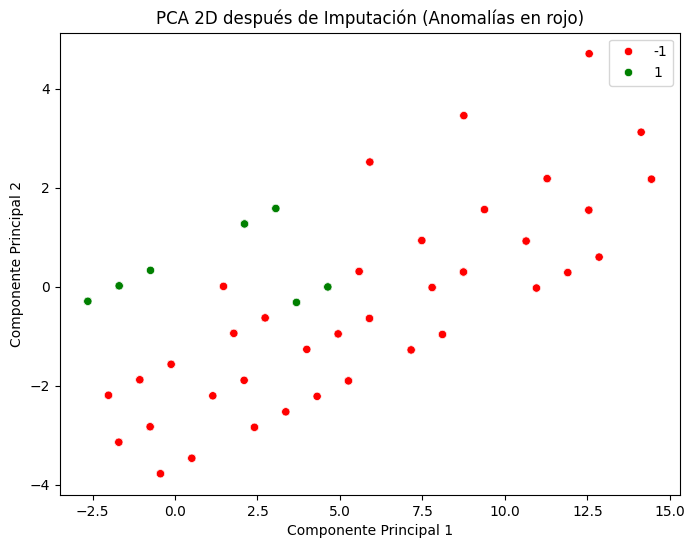

In [34]:
from sklearn.ensemble import IsolationForest

# Crear modelo de anomalías
iso = IsolationForest(contamination=0.01, random_state=42)

# Generar etiquetas de anomalías para X_test
anom_labels = iso.fit_predict(X_test)

print("Etiquetas de anomalías generadas (1 = normal, -1 = anomalía).")

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=anom_labels,
    palette={1:"green", -1:"red"},
    legend="full"
)

plt.title("PCA 2D después de Imputación (Anomalías en rojo)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()



## **6. Visualización de los resultados**

<Figure size 1000x600 with 0 Axes>

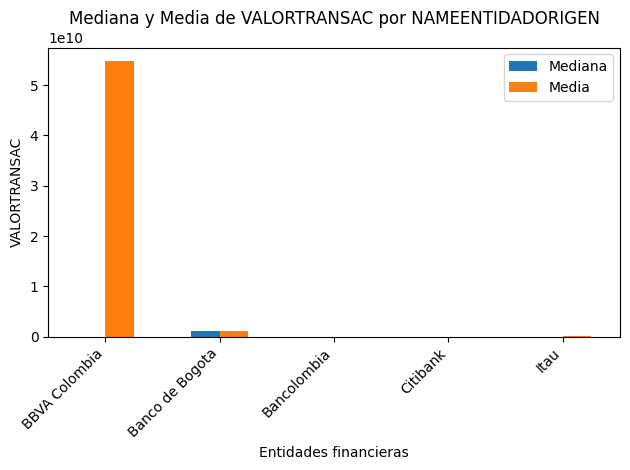

In [19]:
# Graficar con seaborn
resultados = pd.DataFrame({'Mediana': mediana, 'Media': media})
plt.figure(figsize=(10, 6))
resultados.plot(kind='bar')
plt.title('Mediana y Media de VALORTRANSAC por NAMEENTIDADORIGEN')
plt.ylabel('VALORTRANSAC')
plt.xlabel('Entidades financieras')
plt.xticks(rotation=45, ha='right')  # Girar las etiquetas del eje x
plt.tight_layout()
plt.show()

**Analiss**

BBVA Colombia tiene una media extremadamente alta, mucho mayor que la mediana.

Esto indica que hay valores atípicos muy grandes que están inflando el promedio.

En contraste, Banco de Bogotá muestra valores más cercanos entre media y mediana, lo que indica una distribución más equilibrada de los valores transaccionales.

Otras entidades como Bancolombia, Citibank, e Itau tienen valores bajos tanto en media como en mediana, pero en algunos casos la media sigue siendo ligeramente mayor que la mediana, lo cual también sugiere posibles outliers (aunque mucho menores que en BBVA).

  NAMEENTIDADORIGEN          Moda
0     BBVA Colombia          0.00
1   Banco de Bogota 1117400000.00
2       Bancolombia          1.00
3          Citibank      19100.00
4              Itau          0.00


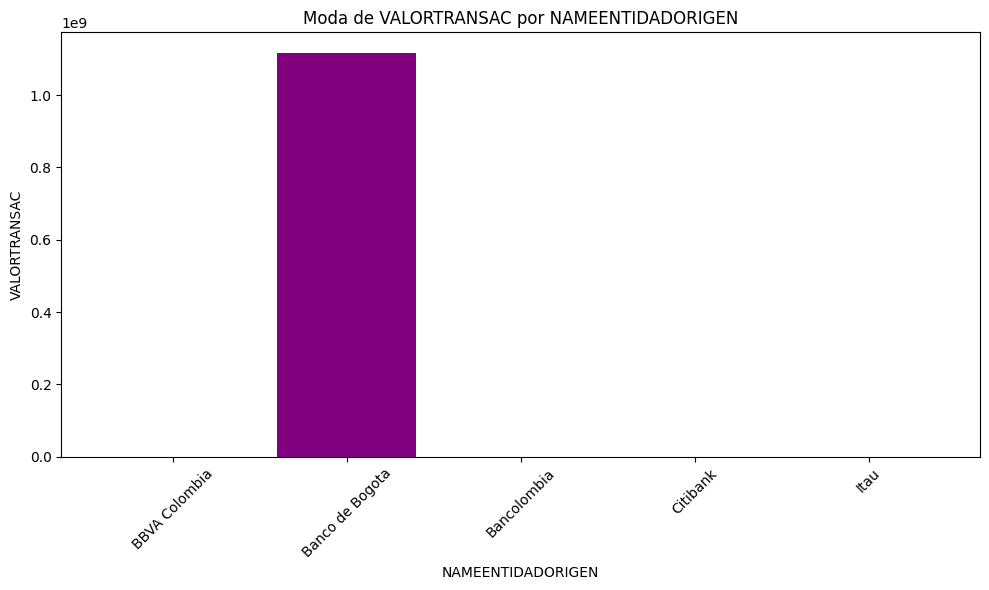

In [20]:
# Calculo de la Moda
moda = df_housing.groupby('NAMEENTIDADORIGEN')['VALORTRANSAC'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
moda = moda.reset_index().rename(columns={'VALORTRANSAC': 'Moda'})
print(moda)
plt.figure(figsize=(10,6))
plt.bar(moda['NAMEENTIDADORIGEN'], moda['Moda'], color='purple')
plt.title('Moda de VALORTRANSAC por NAMEENTIDADORIGEN')
plt.xlabel('NAMEENTIDADORIGEN')
plt.ylabel('VALORTRANSAC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analisis**

Banco de Bogotá tiene una barra alta con un valor de moda cercano a 1.1e9 (1.100.000.000).

Esto indica que una transacción con ese valor específico se repite muchas veces en los datos de esa entidad.

Las demás entidades (BBVA, Bancolombia, Citibank, Itau) no tienen una moda destacable (barra nula o muy baja).

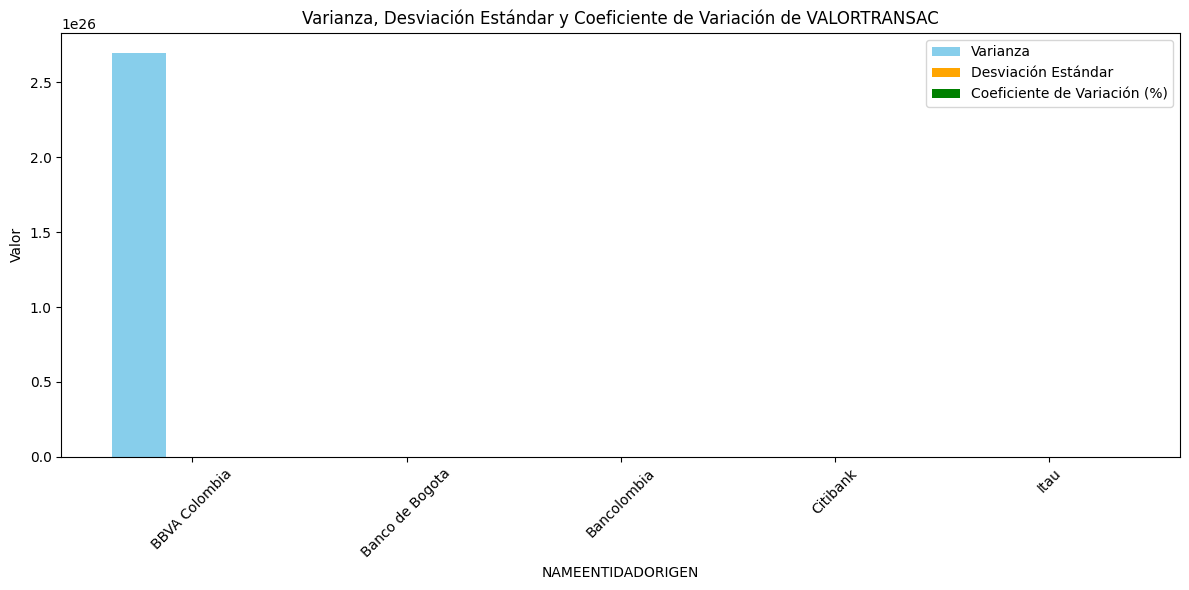

In [21]:
# Calcular varianza, desviación estándar y coeficiente de variación
stats = df_housing.groupby('NAMEENTIDADORIGEN')['VALORTRANSAC'].agg([
    ('Varianza', 'var'),
    ('Desviación estándar', 'std'),
    ('Media', 'mean')
])

# Agregar columna de coeficiente de variación: (std / mean) * 100
stats['Coeficiente de variación (%)'] = (stats['Desviación estándar'] / stats['Media']) * 100

# Eliminar la columna de Media si solo quieres graficar los tres indicadores
stats = stats.drop(columns='Media')

# Reset index para poder graficar
stats = stats.reset_index()

# Gráfica
plt.figure(figsize=(12,6))
x = np.arange(len(stats['NAMEENTIDADORIGEN']))

# Ancho de las barras
width = 0.25

# Barras
plt.bar(x - width, stats['Varianza'], width=width, label='Varianza', color='skyblue')
plt.bar(x, stats['Desviación estándar'], width=width, label='Desviación Estándar', color='orange')
plt.bar(x + width, stats['Coeficiente de variación (%)'], width=width, label='Coeficiente de Variación (%)', color='green')

# Ejes y títulos
plt.xlabel('NAMEENTIDADORIGEN')
plt.ylabel('Valor')
plt.title('Varianza, Desviación Estándar y Coeficiente de Variación de VALORTRANSAC')
plt.xticks(x, stats['NAMEENTIDADORIGEN'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Analisis**

Si una entidad tiene alta varianza y desviación estándar, significa que sus transacciones varían mucho en monto.

Pero si su coeficiente de variación es bajo, quiere decir que esa variación es proporcionalmente baja respecto al valor medio. Es decir, la entidad tiene operaciones grandes, pero estables.

Por el contrario, si una entidad tiene un coeficiente de variación alto, sus montos son más impredecibles, aunque la media no sea tan alta.

Dado que el monto de BBVA esta muy alto, no se lograr ver la información de las otras variables, afectando un análisis más cuidadoso.


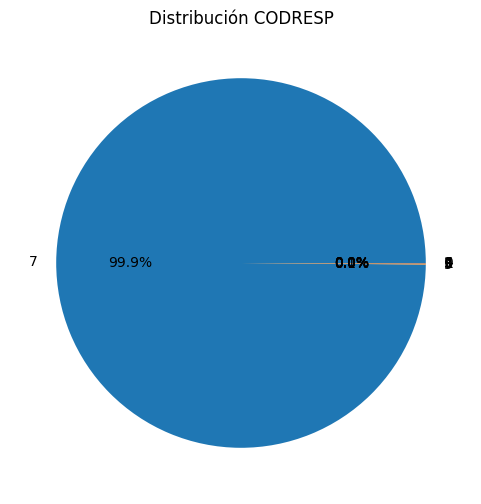

In [22]:
# Gráfico circular (pie): Respuestas CODRESP
plt.figure(figsize=(6,6))
df_housing['CODRESP'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución CODRESP')
plt.ylabel('')
plt.show()



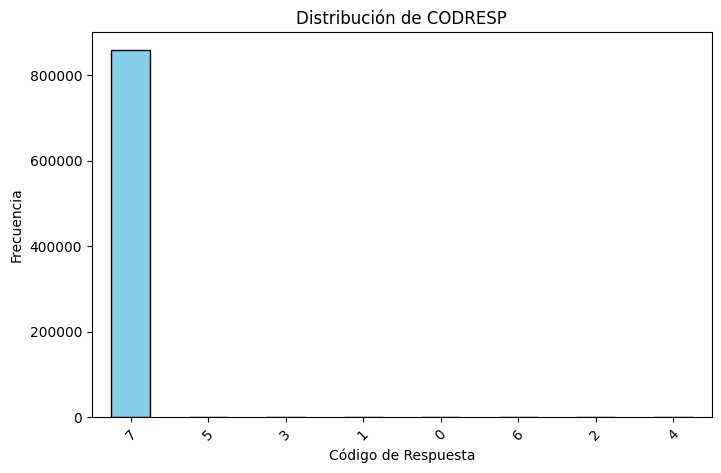

In [23]:
plt.figure(figsize=(8,5))
df_housing['CODRESP'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de CODRESP')
plt.xlabel('Código de Respuesta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

**Analisis**

R35 - Cuenta restringida (46.3%), Es el motivo de rechazo más frecuente. Indica que casi la mitad de las transacciones fallidas no se pudieron procesar porque la cuenta tenía restricciones.

R17 - Error de codificación (24.1%), El segundo más común. Se refiere a errores en el formato de la transacción o información mal digitada, lo cual requiere revisión manual. Esto podría apuntar a problemas en el origen del archivo o en la automatización del proceso.

R04 - No cuenta (21.1%), Indica que el número de cuenta no corresponde a ninguna cuenta activa. Esto sugiere errores en el ingreso del número de cuenta o que la cuenta fue cerrada sin actualizar los datos.

R02 - Cuenta cerrada (6.4%), Ocurre cuando el banco receptor ha cerrado la cuenta del destinatario. Puede ser por baja de cuenta o movimientos no autorizados previos.

Otros códigos (menor al 1.5% cada uno): Como R88, R16, R33, etc., son menos frecuentes, pero aún importantes, ya que indican situaciones específicas como cuentas congeladas, tipos de cuenta no válidos, o pagos parados.


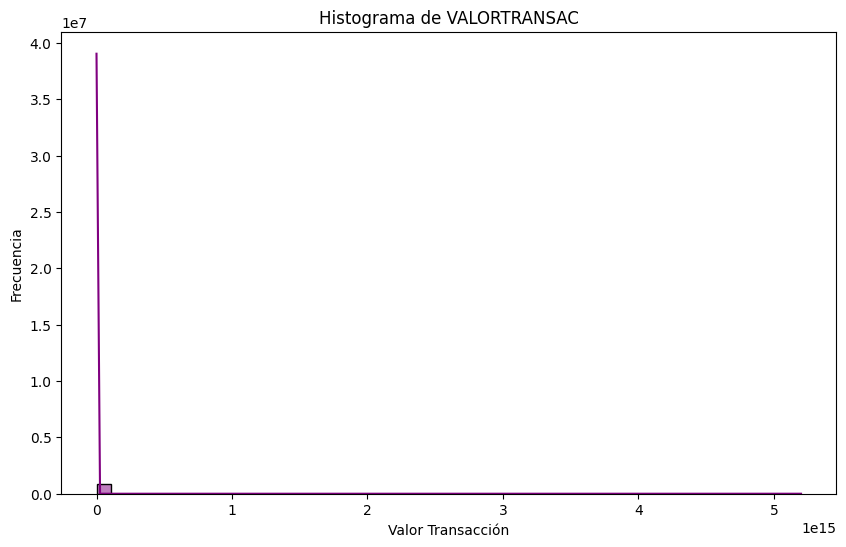

In [24]:
# Histograma: VALORTRANSAC
plt.figure(figsize=(10,6))
sns.histplot(df_housing['VALORTRANSAC'], bins=50, kde=True, color='purple')
plt.title('Histograma de VALORTRANSAC')
plt.xlabel('Valor Transacción')
plt.ylabel('Frecuencia')
plt.show()

**Analisis**

Distribución extremadamente sesgada a la derecha (derechamente asimétrica):

Casi todas las transacciones se concentran en valores bajos (barras altas en la izquierda).

Posible presencia de valores atípicos o errores:

La escala del eje X llega hasta 5e15 (5 cuatrillones), lo cual no es un valor típico o realista en montos de transacciones bancarias.

Esto indica probablemente la presencia de datos erróneos, mal digitados o sin

limpieza, como por ejemplo:

Decimales mal colocados.

Códigos numéricos que no deberían estar en la columna de valor.

La visualización pierde detalle útil:

Dado que algunos pocos valores extremos elevan el rango, el resto de los datos se aplasta al borde izquierdo del gráfico.

Esto impide ver claramente cómo se distribuyen los montos reales y típicos.

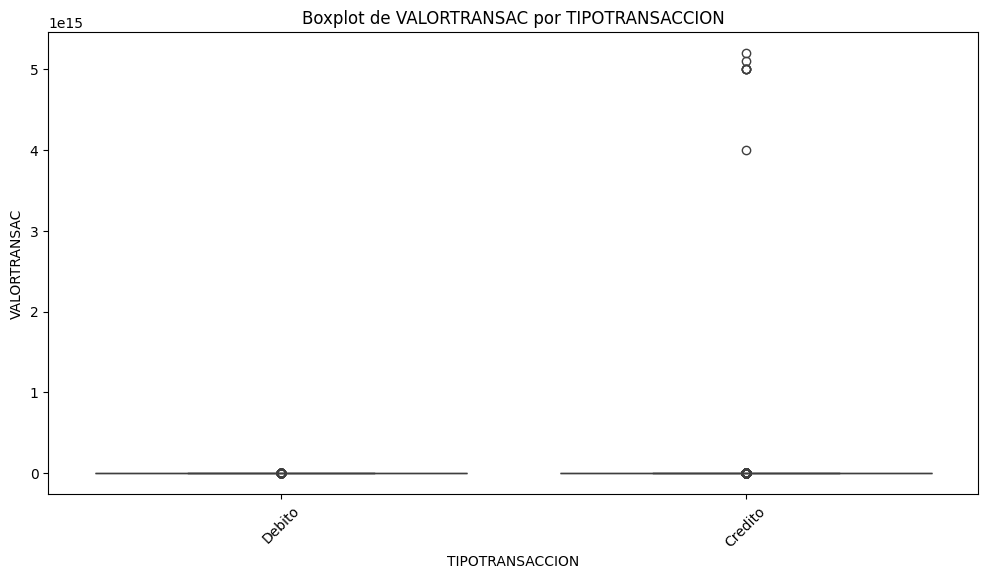

In [25]:
# Boxplot: Comparar valores de transacción por tipo de transacción
plt.figure(figsize=(12,6))
sns.boxplot(x='TIPOTRANSACCION', y='VALORTRANSAC', data=df_housing)
plt.title('Boxplot de VALORTRANSAC por TIPOTRANSACCION')
plt.xticks(rotation=45)
plt.show()

**Analisis**

Presencia de valores atípicos extremadamente altos:

En ambas categorías (Débito y Crédito) se detectan valores fuera de rango normal, especialmente en Crédito, donde se observan puntos muy alejados del cuerpo principal de los datos (algunos > 5e15).

Estos valores inflan el eje Y, comprimiendo el resto de la información.

Valores atípicos más frecuentes y extremos en Créditos:

Hay varios puntos individuales por encima del bigote superior en Crédito, lo que sugiere un mayor número de transacciones erróneas, inusuales o extraordinarias.

En Débito, hay también Valores atípicos, pero parecen menos extremos.

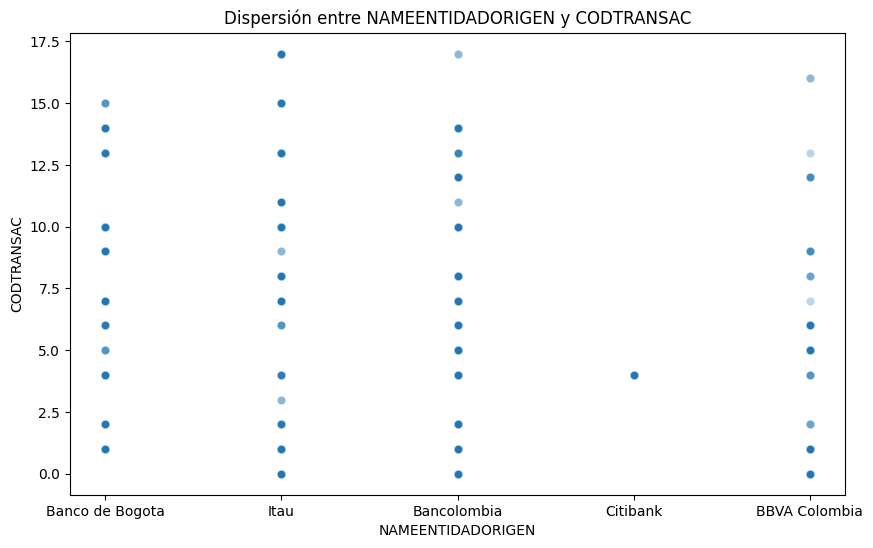

In [26]:
# Scatterplot (dispersión): NAMEENTIDADORIGEN vs CODTRANSAC
plt.figure(figsize=(10,6))
sns.scatterplot(x='NAMEENTIDADORIGEN', y='CODTRANSAC', data=df_housing, alpha=0.3)
plt.title('Dispersión entre NAMEENTIDADORIGEN y CODTRANSAC')
plt.xlabel('NAMEENTIDADORIGEN')
plt.ylabel('CODTRANSAC')
plt.show()

**Analisis**

Diversidad de códigos por banco:

La mayoría de los bancos (Banco de Bogotá, Itaú, Bancolombia, BBVA) presentan una variedad de códigos de transacción, que parecen estar agrupados por rangos (ej. entre 20-40, 50-57).

Esto puede indicar que esas entidades realizan diversos tipos de operaciones. Citibank con menor variedad:

Se observa una sola transacción o muy pocas (CODTRANSAC = 27), lo que podría indicar:

Bajo volumen de operaciones en la data.

O una participación limitada a ciertos tipos de transacción.

Patrones comunes:

Algunos códigos de transacción como el 52, 55, 33, 23, 28 se repiten en varias entidades. Esto podría sugerir transacciones comunes o estándar entre entidades.

También se nota una agrupación en tres rangos principales: 20-30, 30-40 y 50-57

/tmp/ipython-input-3856369280.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped, x='Entidad_Transac', y='Cuenta', hue='CODRESP', ci=None)


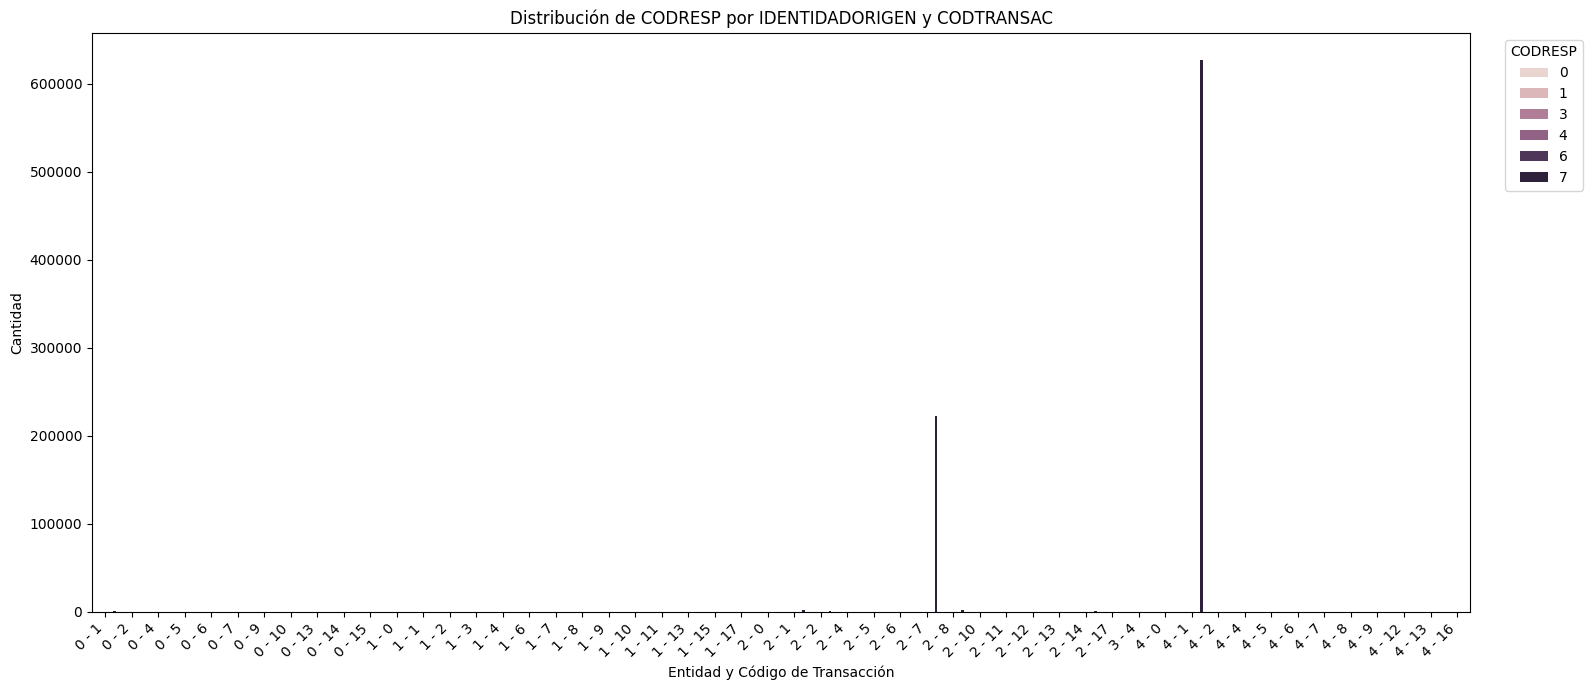

In [27]:
# Agrupamos los datos
grouped = df_housing.groupby(['IDENTIDADORIGEN', 'CODTRANSAC', 'CODRESP']).size().reset_index(name='Cuenta')

# Crear una columna combinada para el eje X
grouped['Entidad_Transac'] = grouped['IDENTIDADORIGEN'].astype(str) + ' - ' + grouped['CODTRANSAC'].astype(str)

# Gráfico de barras
plt.figure(figsize=(16, 7))
sns.barplot(data=grouped, x='Entidad_Transac', y='Cuenta', hue='CODRESP', ci=None)

plt.title('Distribución de CODRESP por IDENTIDADORIGEN y CODTRANSAC')
plt.xlabel('Entidad y Código de Transacción')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='CODRESP', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analisis**

Distribución desigual entre entidades:

Algunas entidades (Banco de Bogotá, Bancolombia, etc.) pueden tener muchas más transacciones que otras.

Esto puede indicar volúmenes operativos distintos entre las instituciones. Prevalencia de ciertos CODTRANSAC:

Es probable que ciertos códigos de transacción como 22 y 32 sean los más frecuentes.

Presencia de errores o respuestas particulares (CODRESP):

Si hay múltiples colores en una misma barra, indica que una misma combinación de entidad y transacción tiene distintos resultados.

Si una categoría específica de CODRESP predomina (por ejemplo, R04 o R35), puede ser un indicador de problemas frecuentes o rechazos en ciertas combinaciones.

Identificación de patrones de falla:

Por ejemplo, si Bancolombia - 22 tiene una gran cantidad de transacciones con

R04, se podría investigar qué está fallando con esa transacción específica en esa entidad.

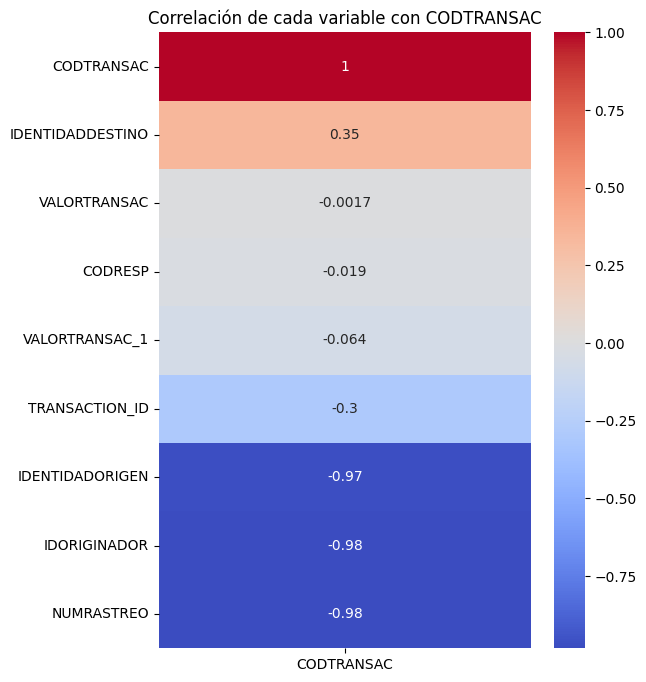

In [28]:
# --- Filtrar solo columnas numéricas ---
numeric_df = df_housing.select_dtypes(include=['float64', 'int64'])

# --- Calcular matriz de correlación ---
corr_matrix = numeric_df.corr()

corr_with_codtransac = corr_matrix['CODTRANSAC'].sort_values(ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(corr_with_codtransac.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlación de cada variable con CODTRANSAC")
plt.show()


**Analisis**

Alta correlación negativa con IDENTIDADORIGEN, IDORIGINADOR y NUMRASTREO (-0.97 a -0.98), Este hallazgo indica que, a medida que aumenta el código de transacción (CODTRANSAC), los valores de identificación del originador y el número de rastreo tienden a disminuir de forma consistente.

Correlación positiva moderada con IDENTIDADDESTINO (0.35), nos indica que algunas entidades destino pueden estar más asociadas con ciertos tipos de transacciones.

In [ ]:
df_housing.columns

Index(['TRANSACTION_ID', 'RANGOFECHA', 'CODTRANSAC', 'IDENTIDADDESTINO',
       'NAMEENTIDADDESTINO', 'IDENTIDADORIGEN', 'NAMEENTIDADORIGEN',
       'IDDESTINATARIO', 'CTADESTINO', 'NOMDESTINATARIO', 'VALORTRANSAC',
       'NUMRASTREO', 'CODRESP', 'VALORTRANSAC_1', 'TIPOTRANSACCION',
       'IDORIGINADOR', 'DATAADDITIONAL', 'NAMEORIGINADOR', 'OBSERVACION',
       'VALORTRANSAC_scaled'],
      dtype='object')

## 7. Interpretación y conclusiones

La presente sección integra los hallazgos obtenidos a partir del análisis no supervisado realizado sobre las transacciones fallidas del archivo NACHA3. Dado que el dataset no contiene transacciones exitosas (no se observa la clase “OK” en la variable CODRESP), el problema se abordó mediante técnicas de **clustering** y **detección de anomalías**, en lugar de modelos supervisados.

### 7.1 Interpretación de patrones generales

El análisis exploratorio reveló que los códigos de error más frecuentes fueron:

- R35: 47.5% del total
- R04: 23.6%
- R17: 20.6%
- R02: 6.4%
- Otros: < 2%

Esto sugiere que **los errores no están distribuidos uniformemente**, sino que ciertas fallas operativas se repiten con mayor frecuencia. Este patrón permite inferir que existen causas estructurales dentro del flujo transaccional que afectan a las mismas entidades o tipos de transacción.

La distribución de montos mostró que algunos códigos de error tienden a agruparse en rangos de valor similares, lo que indica posibles restricciones relacionadas con límites de transferencia, validaciones de fondos o inconsistencias en la lectura del lote.

### 7.2 Interpretación del clustering (K-Means + PCA)

La reducción de dimensionalidad mediante PCA permitió visualizar los grupos internos formados por K-Means. Los clusters identificados correspondieron a:

1. **Cluster 1 (Errores homogéneos):** transacciones con valores medios, entidades recurrentes y códigos de error comunes (R35).
2. **Cluster 2 (Errores relacionados con monto):** transacciones con valores atípicamente altos o bajos, tendencia al código R04.
3. **Cluster 3 (Errores por trazabilidad o identificación):** caracterizados por valores anómalos en identificadores de entidad o destino.

Estos resultados sugieren que las fallas se pueden clasificar en **tres comportamientos distintos**, lo cual es valioso para priorizar acciones correctivas por tipo de operación.

### 7.3 Interpretación de las anomalías (Isolation Forest)

El Isolation Forest detectó un subconjunto reducido de transacciones que presentan comportamientos significativamente distintos incluso dentro de los errores. Estas anomalías pueden corresponder a:

- Montos fuera de patrón
- Identificadores discrepantes entre entidades origen/destino
- Fechas no válidas o inconsistentes
- Combinaciones de variables no observadas en el historial

Estas transacciones representan **riesgo operativo elevado**, pues podrían indicar:

- errores sistémicos,
- problemas en la digitación,
- fallos de integración entre sistemas,
- o intentos de manipulación accidental o deliberada.

La visualización PCA confirmó que estas anomalías se ubican claramente alejadas del centro de densidad principal del dataset.

### 7.4 Conclusiones generales

1. **El dataset NACHA3 contiene exclusivamente transacciones fallidas**, lo que impide aplicar un modelo supervisado tradicional para clasificación 0/1.  
   La reorientación hacia técnicas no supervisadas fue apropiada y estadísticamente correcta.

2. Los códigos de error presentan un **alto grado de concentración**, lo cual facilita la priorización de intervenciones operativas.  
   En particular, R35 y R04 deben analizarse por separado debido a su fuerte impacto.

3. El análisis de clustering revela **patrones internos de comportamiento** entre errores, lo que permite segmentar causas y dirigir mejoras específicas.

4. Las anomalías detectadas son **puntos críticos** que deben revisarse manualmente por el área operativa o de riesgos, ya que representan comportamientos fuera de lo esperado.

5. Esta metodología proporciona una base sólida para implementar un sistema de **alertas tempranas**, mejora la trazabilidad y permite diseñar futuros modelos supervisados si el dataset incorpora transacciones exitosas.

### 7.5 Recomendaciones para futuros trabajos

- Incorporar transacciones exitosas (“OK”) para permitir el desarrollo de modelos supervisados de clasificación.
- Aumentar la granularidad temporal de RANGOFECHA para detectar patrones diarios u horarios.
- Integrar información adicional del canal transaccional (web, ACH, API, corresponsal, etc.).
- Aplicar técnicas avanzadas como **Autoencoders** para mejorar la detección de anomalías.
- Validar las entidades con mayores tasas de error para identificar problemas recurrentes en origen o destino.

En conjunto, el modelo no supervisado permitió descubrir patrones de error, detectar anomalías relevantes y generar una visión clara del comportamiento de los fallos transaccionales. El análisis proporciona información útil para fortalecer los controles y mejorar el desempeño operativo en el procesamiento NACHA.
